

----------------------------------------------------------------------------------------


# How Brazil was affected by Hosting the 2016 Summer Olympics
----------------------------------------------------------------------------------------


### How hosting the Olympics impacted number of total medals and gold medals Brazil won that year.

#### Assumption

* We assume that Athletes of hosting country will have more familiarity with home field, receive great support from home crowd, have easier qualification criteria, thus more participation is expected.
* Considering all these factors we are expecting increase in number of Medals Brazil won in Rio 2016 comparing to the number of medals Brazil usually wins.
----------------------------------------------------------------------------------------

### Data Source

* Historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016 was used.
 - This dataset was scraped from www.sports-reference.com in May 2018.
 - https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=noc_regions.csv
 - The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete   competing in an individual Olympic event (athlete-events).

* World Bank's data API was used to get GDP data.
 - WBGAPI python package to work with data was installed and used.
 - https://pypi.org/project/wbgapi/
 - pip install wbgapi

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb
from scipy.stats import linregress

### Get the Data
* Load data from csv file
* Clean data: remove NaN values, remove duplicates

In [201]:
# Load data about all the athletes/events through the history of Olympics games
path = "../Resources/athlete_events.csv"
all_olymp = pd.read_csv(path)

In [202]:
# Create Data Frame for Brazil team 
brazil_all = all_olymp.loc[(all_olymp["Team"]=="Brazil")|(all_olymp["Team"]=="Brazil-1")]
brazil_all

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268652,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
269745,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
269899,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
270478,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


#### Clean data
#### Drop rows with NaN values to calculate the number of medals Brazil won

In [203]:
bra_athlets_medal = brazil_all.dropna(inplace = False)
bra_athlets_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267709,133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver
268211,134186,"Jos Elias ""Z Elias"" Moedim Jnior",M,19.0,178.0,75.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze
268218,134190,"Jos Marco ""Z Marco"" Nobrega Ferreira de Melo",M,29.0,190.0,86.0,Brazil-1,BRA,2000 Summer,2000,Summer,Sydney,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Silver
268219,134191,"Jos Marcelo ""Z Maria"" Ferreira",M,22.0,175.0,71.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze


#### Search for duplicates, include Athlet ID, Games, Event and Medal

In [204]:
medal_duplicates = bra_athlets_medal.loc[bra_athlets_medal.duplicated(subset = ["ID", "Games", "Medal", "Event"])]
medal_duplicates

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


#### Create DataFrame with medals for Brazil
* Initial data set includes all medals for all athletes
* We need to exlude medals that athlets win in the same event
* E.g. for such events as "Football Men's Football" the whole team gets medals, but for Brazil it is only one medal

In [205]:
# Get Names of Group Events with duplicated medals

# Get years Brazil participated in Olympics
years = bra_athlets_medal["Year"].unique()

# Create List to store Names of Group Events
group_events = []

# Iterate bra_athlets_medal DataFrame by years
for year in years:
    
    df = bra_athlets_medal.loc[(bra_athlets_medal["Year"]==year)]
    
    # For each year find duplicates in Event, Medal columns, get Group Names from Event column
    values = df.loc[df.duplicated(subset = ["Event", "Medal"])]["Event"].unique()
    
    # Add found unique Group Names to group_events    
    for val in values:
        if val not in group_events:
            group_events.append(val)
            
group_events

["Football Men's Football",
 "Volleyball Men's Volleyball",
 'Sailing Mixed Three Person Keelboat',
 'Sailing Mixed Multihull',
 'Sailing Mixed Two Person Keelboat',
 "Beach Volleyball Men's Beach Volleyball",
 "Volleyball Women's Volleyball",
 "Beach Volleyball Women's Beach Volleyball",
 "Sailing Men's Two Person Keelboat",
 "Basketball Women's Basketball",
 "Athletics Men's 4 x 100 metres Relay",
 'Equestrianism Mixed Jumping, Team',
 "Swimming Men's 4 x 100 metres Freestyle Relay",
 "Football Women's Football",
 "Sailing Women's Two Person Dinghy",
 "Basketball Men's Basketball",
 "Sailing Women's Skiff",
 "Canoeing Men's Canadian Doubles, 1,000 metres",
 "Swimming Men's 4 x 200 metres Freestyle Relay",
 'Sailing Mixed Two Person Dinghy',
 'Sailing Mixed Two Person Heavyweight Dinghy']

In [206]:
# Store indices of found duplicated medals
indices = []

# Iterate over Data Frame to locate indices of the duplicated medals
# By duplicated here we mean medal for a group event like "Volleyball Men's Volleyball"

# For each year
for year in years:
   
    # Find duplicated medals for each event in group_events    
    for event in group_events:
        
        all_index = bra_athlets_medal.loc[
            (bra_athlets_medal["Year"]==year)&(bra_athlets_medal["Event"]==event)].index
        
        # If such medals are found store the indices of rows except the first one to keep the medal for Brazil        
        if len(all_index)>0:
            
            for i in range(1, len(all_index)):
                
                indices.append(all_index[i])

# Drop rows with duplicated medals                
brazil_medals = bra_athlets_medal.drop(indices, inplace=False)

# Save Brazil medals to .csv
brazil_medals.to_csv("Output/BRA_medals.csv")
brazil_medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
1733,966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221565,111358,Maicon de Andrade Siqueira,M,23.0,190.0,90.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Heavyweight,Bronze
252454,126422,Douglas Eduardo Vieira,M,24.0,170.0,95.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Judo,Judo Men's Half-Heavyweight,Silver
263339,131784,Felipe Almeida Wu,M,24.0,169.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Pistol, 10 metres",Silver
267707,133931,Arthur Nabarrete Zanetti,M,22.0,156.0,61.0,Brazil,BRA,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Rings,Gold


In [207]:
# Test DataFrame after drop
check = brazil_medals.loc[(brazil_medals["Year"]==2016)].sort_values(by='Event')
check

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
28565,14810,Thiago Braz da Silva,M,22.0,183.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Pole Vault,Gold
4825,2758,Alison Conte Cerutti,M,30.0,203.0,106.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Gold
14312,7716,Brbara Seixas de Freitas,F,29.0,178.0,67.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Silver
43889,22623,Robson Donato Conceio,M,27.0,171.0,57.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,Gold
194969,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",Silver
194968,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 1,000 metres",Silver
194967,97845,Isaquias Queiroz dos Santos,M,22.0,175.0,85.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 200 metres",Bronze
58064,29713,Douglas dos Santos Justino de Melo,M,22.0,173.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
149540,75010,Arthur Nory Oyakawa Mariano,M,22.0,169.0,65.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,Bronze
101753,51457,Diego Matias Hyplito,M,30.0,170.0,68.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,Silver


### Investigate how the hosting of Rio 2016 affected the number of medals Brazil won.
* Calculate the number of total Medals Brazil won in each year the country participated in Olympics 
* Calculate the number of Gold Medals Brazil won in each year the country participated in Olympics
* Compare Medals count in the hosting year to the previous years

### Bar Chart
#### Total Medals Brazil won in Olympics

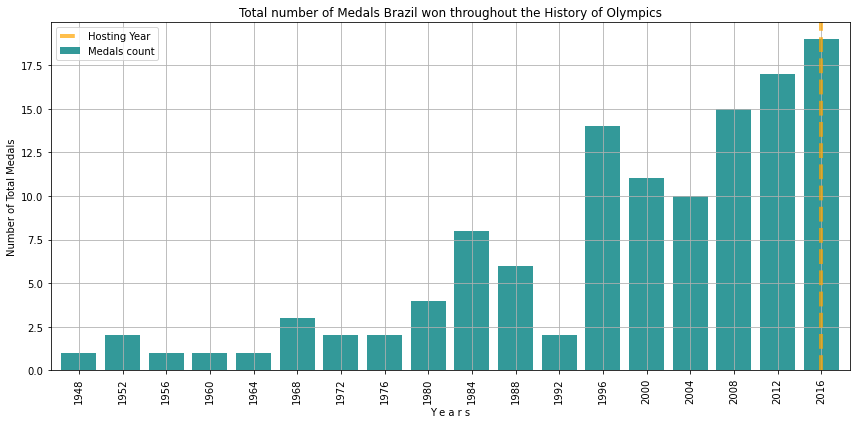

In [208]:
# Calculate the number of total Medals over years
total_medals = brazil_medals.groupby("Year")["Medal"].count()

fig,ax = plt.subplots()

medals_plot = total_medals.plot(kind = "bar", figsize=(12,6), width = 0.8, color="teal", alpha = 0.8,
                             title = "Total number of Medals Brazil won throughout the History of Olympics",
                                grid = True, ax = ax, label = "Medals count")
medals_plot.set_ylabel("Number of Total Medals")
medals_plot.set_xlabel("Y e a r s")

ax.axvline(total_medals.index.searchsorted('2016'), color="orange", linestyle="--", lw=4,
           alpha = .7, label="Hosting Year")

plt.legend()
plt.tight_layout()

fig.savefig(f"Output/BRA_Total_medals.png")

### Find average number of Medals Brazil usually wins

In [209]:
aver96_12 = total_medals.loc[total_medals.index>=1996].mean()
print(f"Average number of Medals in 1996-2012: {round(aver96_12,2)}")
aver_less96 = total_medals.loc[total_medals.index<1996].mean()
print(f"Average number of Medals in 1996-2012: {aver_less96}")

Average number of Medals in 1996-2012: 14.33
Average number of Medals in 1996-2012: 2.75


#### Gold Medals Brazil won in Olympics

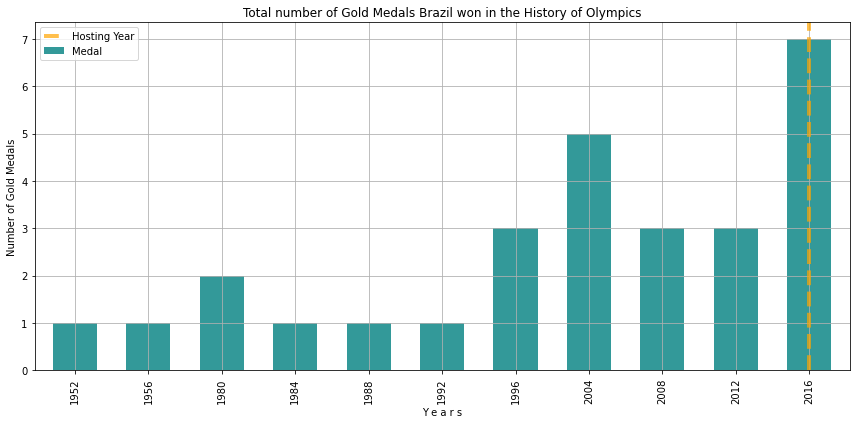

In [210]:
# Calculate the number of Gold Medals over years
gold_medals = brazil_medals.loc[brazil_medals["Medal"]=="Gold"].groupby("Year")["Medal"].count()

figG,ax = plt.subplots()

gold_plot = gold_medals.plot(kind = "bar", figsize=(12,6),
                             width = 0.6, color="teal", alpha = 0.8, grid = True,
                             title = "Total number of Gold Medals Brazil won in the History of Olympics")
gold_plot.set_ylabel("Number of Gold Medals")
gold_plot.set_xlabel("Y e a r s")

ax.axvline(gold_medals.index.searchsorted('2016'), color="orange", linestyle="--", lw=4,
           alpha = .7, label="Hosting Year")

plt.legend()
plt.tight_layout()

figG.savefig(f"Output/BRA_Gold_medals.png")

### Investigate GDP measure
* A possible factor of increasing medal count could be the increase of GDP (or GDP per capita).
* Get GDP per capita Data for years corresponding the Olympics.
* Build Linear Regression Model to see if there is a correlation between Medal Count and GDP.

In [211]:
# Get GDP per capita
wb.series.info('NY.GDP.PCAP.CD')
BRA_gdp = wb.data.DataFrame(['NY.GDP.PCAP.CD', 'SP.POP.TOTL'], 'BRA', range(1980, 2020, 4))
BRA_gdp

,YR1980,YR1984,YR1988,YR1992,YR1996,YR2000,YR2004,YR2008,YR2012,YR2016
series,,,,,,,,,,
NY.GDP.PCAP.CD,1.947276e+03,1.578926e+03,2.300377e+03,2.596920e+03,5.166164e+03,3.749753e+03,3.637462e+03,8.831023e+03,1.237002e+04,8.710097e+03
SP.POP.TOTL,1.206940e+08,1.323836e+08,1.436275e+08,1.542594e+08,1.646147e+08,1.747903e+08,1.840065e+08,1.920304e+08,1.992873e+08,2.061631e+08


In [212]:
# Create DataFrame for Total Medals/GDP over available years - starting from 1980
# Get years
years_80_16_row = brazil_medals.loc[brazil_medals["Year"]>=1980]["Year"].unique()
years_80_16 = sorted(years_80_16_row)

# Get medals
medals80_16 = brazil_medals.loc[brazil_medals["Year"]>=1980].groupby("Year")["Medal"].count()
medals80_16

# Get GDPs
col_names = BRA_gdp.columns

# Rename columns in GDP df
allGDP = BRA_gdp.rename(columns={col_names[i]:years_80_16[i] for i in range(len(years_80_16))})
allGDP

# Create DataFrame
medals_GDP_df = pd.DataFrame({
    "GDPs": allGDP.loc["NY.GDP.PCAP.CD"],
    "Medals": medals80_16
}, index = years_80_16)
medals_GDP_df

,GDPs,Medals
1980,1947.276382,4
1984,1578.926405,8
1988,2300.376812,6
1992,2596.919842,2
1996,5166.163933,14
2000,3749.753271,11
2004,3637.462429,10
2008,8831.023117,15
2012,12370.024449,17
2016,8710.096774,19


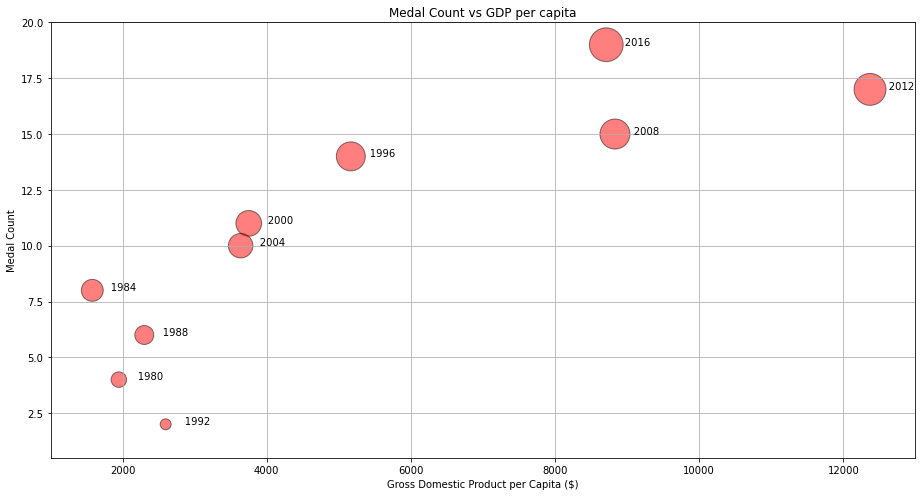

In [213]:
# Plot scatter chart for Total medals vs GDP per capita, set weights as number of Medals

# Define size of markers
s = [60*n for n in medals_GDP_df.Medals]
s

# Set Parameters for scatter plot
figS, ax = plt.subplots()
figS.set_size_inches(13, 7)

scatter_plot = medals_GDP_df.plot(kind = 'scatter', x = "GDPs", y = "Medals", grid=True,
                   s = s, marker="o", c="red", alpha = .5, edgecolors="black",
                   title="Medal Count vs GDP per capita", ax=ax)

scatter_plot.set_xlabel("Gross Domestic Product per Capita ($)")
scatter_plot.set_ylabel("Medal Count")
scatter_plot.set_ylim(0.5,20)
scatter_plot.set_xlim(1000,13000)

for k, v in medals_GDP_df.iterrows():
    ax.annotate(f"      {k}", v)

plt.tight_layout()

figS.savefig(f"Output/Medals_vs_GDP.png")

R-value is 0.8496337294249585


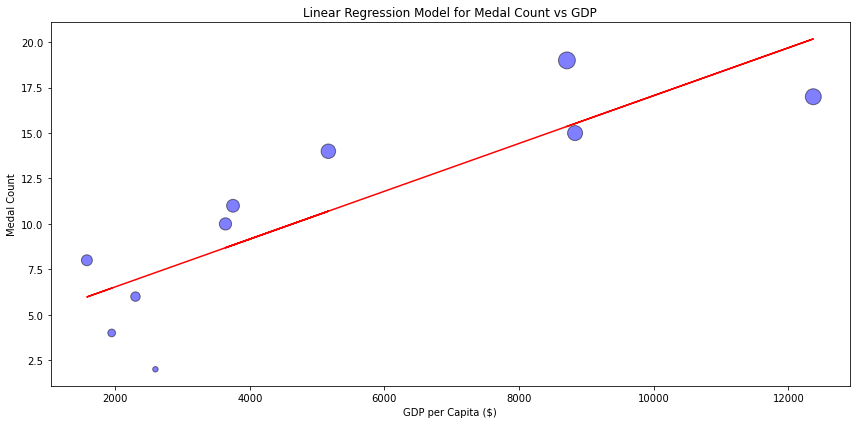

In [214]:
# Build linear regression model to find if there is a correlation btw Medal Count and GDP

x_values = medals_GDP_df.GDPs
y_values = medals_GDP_df.Medals

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Plot linear regression with scatter plot
plt.figure(figsize=(12,6))
plt.scatter(x_values,y_values, marker="o", s = [v/4 for v in s], c="blue", alpha = .5, edgecolors="black")
plt.plot(x_values,regress_values,"r-")

plt.title("Linear Regression Model for Medal Count vs GDP")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Medal Count")

print(f"R-value is {rvalue}")

plt.tight_layout()

plt.savefig(f"Output/Lin_regress_Medals_vs_GDP.png")

### Analysis
* Data for Total Number of Medals and Number of Gold Medals Brazil won in each Olympics was obtained and investigated.
* Bar Charts for Total number of Medals and Total number of Gold Medals over olympics years shows:
 - Hosting Year 2016:
    * Total number of Medals is higher than in any other previous games: 19 medals total.
     - The average for years with highest Medal Count (1996-2012) is 14.3;
     - The average for all other years (<1996) is 2.75 total medals. 
    * Total number of Gold Medals is higher than in any other previous games: 7 gold medals.
     - The next highest number is 5 Gold Medals in 2004;
     - For all other games the average number is 1.7 gold medals.
* GDP per capita data was obtained for Olympics years to investigate if there is a correlation between Medal Count and GDP per capita.
 - Scatter Chart for Total Medals vs GDP per capita for Olympics years was plotted. Weights are the Medal Counts.
 - Linear Regression Model was calculated and plotted for those values.
 - Found R-value = 0.85 shows that there is a strong correlation between GDP per capita and Medals Count.
 - However, the hosting year does not have the highest GDP (8710.097), but the Medal number is the highest (19).
 
#### Conclusion
* The obtained during analysis data shows that in the hosting year 2016 Brazil won its highest number of medals comparing to previous years. This is true for total number of medals as well as for number of gold medals.
* We investigated Brazil GDP over Olympics years to see if number of medals country wins could be explained by country's GDP.
* We found strong correlation between Number of Medals and GDP per capita with R-value = 0.85.
* However, GDP itself can not explain the raise in Number of Medals in 2016.
* So we can conclude that our assumption was correct and it's hosting of the Olympics that caused Brazil to win more medals this year.